# Diferenciación numérica en Python

___


## Series de Taylor 

El teorema de Taylor establece que dado un entero positivo $n$, y una función que es derivable al menos $n$ veces con todas sus derivadas contínuas alrededor de $x_0$, el valor de la función en un punto $x$ en la vecindad de $x_0$ se puede expresar como

 $$f(x) = f(x_0) + \sum_{j=0}^{n}\dfrac{f^{(j)}(x_0)}{j!}(x-x_0)^j +\dfrac{f^{(n+1)}(c)}{(n+1)!}(x-x_0)^{n+1}  
$$

para algún valor $c$ entre $x_0$ y $x$. Este resultado puede escribirse de la forma compacta 

$f(x) = P_n(x)+R_n(x).$

El polinomio obtenido al truncar la serie en $n$ términos es llamado **$n$-esímo polinomio de Taylor**  y $R_n$ es el **residuo** o **error de truncamiento**.


**Tarea 1:** Aproximar la función 
    \begin{equation}
    f(x)=\frac{xe^x}{x^2+3x+1}
    \end{equation}
    en el intervalo $[-5,5]$. Calcule varias aproximaciones y establezca un límite de la serie de taylor para obtener una aproximación ajustada y precisa.

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
from sympy import init_printing
from sympy.plotting import plot
from sympy.utilities.lambdify import lambdify
init_printing(use_latex=True)
import scipy as sc
from scipy.misc import derivative
from scipy.interpolate import approximate_taylor_polynomial
import scipy.integrate as integrate
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline

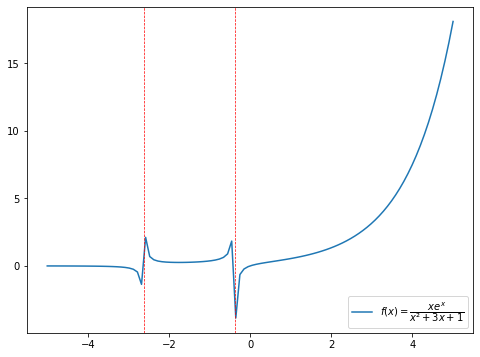

Asíntotas en [-2.61803399 -0.38196601]


In [2]:
x = np.linspace(-5, 5, num=100)

plt.figure(figsize = (8,6))
plt.plot(x, x*np.exp(x) / (x**2 + 3*x + 1), label='$f(x)=\dfrac{xe^x}{x² + 3x + 1}$')
plt.axvline(x=-2.61803399, ls='--', c='r', lw=0.7)
plt.axvline(x=-0.38196601, ls='--', c='r', lw=0.7)
plt.legend()
plt.show()

p = np.polynomial.polynomial.Polynomial([1, 3, 1])
print('Asíntotas en', p.roots())

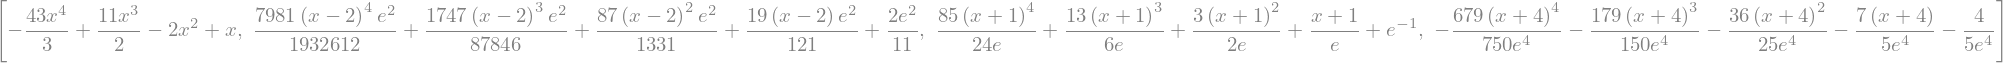

In [3]:
x = sp.Symbol('x')
y = x*sp.exp(x) / (x**2 + 3*x + 1)


def TaylorSimb(center):
    #center = [0, 2, -1, -4]
    polynomials = []
    for i in center:
        pol = sp.series(y, x, x0=i, n=5).removeO()
        polynomials.append(pol)
    return polynomials  


TaylorSimb([0, 2, -1, -4])

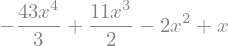

In [4]:
def Taylor(y, n, x0, k):
    polinomio = 0
    while not (k>n):
        taylor = (y.diff(x, k).subs(x, x0) / np.math.factorial(k))*(x-x0)**k
        polinomio = polinomio + taylor
        k = k+1
    return polinomio

Taylor(y, 4, 0, 0)

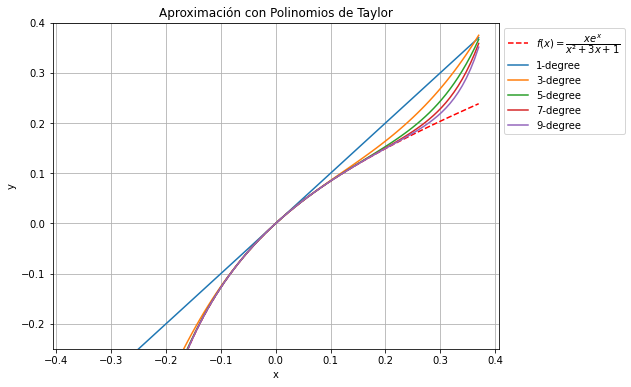

In [5]:
xi = np.linspace(-0.37, 0.37, num=100)
fxn = sp.utilities.lambdify(x, y, 'numpy')
fi = fxn(xi)

plt.figure(figsize = (8,6))
plt.plot(xi,fi,'r', label= '$f(x)=\dfrac{xe^x}{x² + 3x + 1}$', ls='--')


for degree in np.arange(1, 10, step=2):
    taylor = Taylor(y, degree, 0, 0)
    taylor = sp.utilities.lambdify(x, taylor, 'numpy')
    taylor = taylor(xi)
    plt.plot(xi, taylor, ''.format(degree), label=r"{}-degree".format(degree))    
        
    
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-.25,0.4)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Aproximación con Polinomios de Taylor')
plt.show()

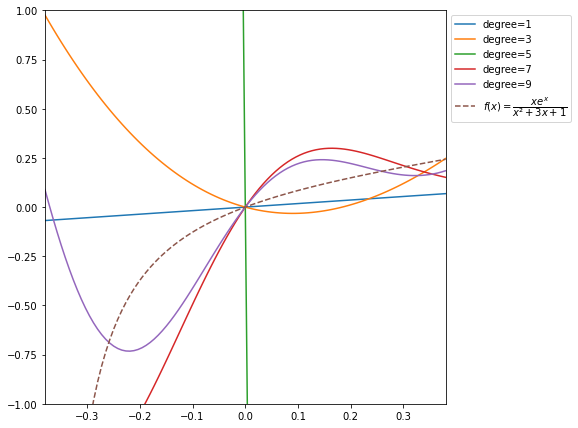

In [6]:
x = np.linspace(-0.38, 0.38, num=100)
f = lambda x: x*np.exp(x) / (x**2 + 3*x + 1)
plt.figure(figsize = (8,6))

for degree in np.arange(1, 10, step=2):
    taylor = approximate_taylor_polynomial(f, 0, degree, 1, order=degree + 2)
    plt.plot(x, taylor(x), label=f'degree={degree}')
plt.plot(x, f(x), label='$f(x)=\dfrac{xe^x}{x² + 3x + 1}$', ls='--')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.axis([-.38, .38, -1, 1])
plt.show()

## Película jabonosa entre dos aros

- **Tarea 3**: http://www.sc.ehu.es/sbweb/fisica3/fluidos/pelicula/pelicula.html. Haga un análisis numérico, usando sólo derivadas (e integrales) numéricas en la cual podamos modelar, el área de la película de jabón que se forma entre los extremos de dos aros de radio $r_1$ y $r_2$ separados una distancia $h$. Haga una rutina que permita ver los límites de este modelo. ¿Cuándo ya no se formará una película? ¿Bajo que condiciones?

Producimos una película de jabonosa entre dos aros de radios $r_1$ y $r_2$ separados una distancia h. 

![funcion.png](funcion.png)

La relación entre el radio de los dos aros $R$, la separación entre los mismos y el radio del mínimo $a$ es $R=a \cosh\Big(\dfrac{h}{2a}\Big)$. Al despejar y multiplicar en ambos lados por $\dfrac{a}{R}$ nos queda $\dfrac{h}{R}=2\dfrac{a}{R}\cosh^{-1}\Big(\dfrac{R}{a}\Big)$.

Tomando a $x=\dfrac{a}{R}$ y $y=\dfrac{h}{R}$, hallamos la derivada de $y=2x\cosh^{-1}(1/x)$ para poder hallar el máximo de la función, es decir, calcular la distancia máxima entre los aros. 

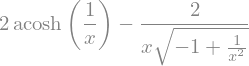

In [7]:
x = sp.Symbol('x')
hR = 2*x*sp.acosh(1/x)
sp.diff(hR,x)

In [8]:
hR = lambda x: 2*x*np.arccosh(1/x)
hR_dx = lambda x: 2*np.arccosh(1/x)-2/np.sqrt(1-x**2)
xc = fsolve(hR_dx, 0.5)
hc = hR(xc)
print('El punto máximo de la función es',  xc, hc)

El punto máximo de la función es [0.55243412] [1.32548684]


Este dato nos indica que no es posible formar una película jabonosa cuando la distancia entre los aros es mayor que 1.32548684. 

Para valores menores son posibles dos superficies. Tomemos $h=0.8$, $R=1$ y veamos bajo qué condiciones se cumple la ecuación $\dfrac{h}{R} = 2\dfrac{a}{R}\cosh^{-1}\Big(\dfrac{R}{a}\Big)$, calculando las raíces de la función $f(x) = 2\dfrac{a}{R}\cosh^{-1}\Big(\dfrac{R}{a}\Big) - h$.

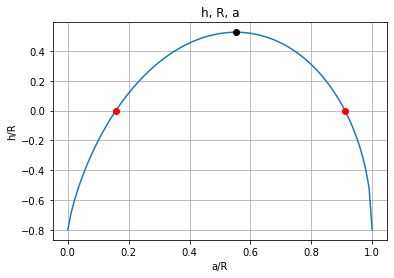

[0.1579624] [0.91073799]


In [9]:
h = 0.8
rts = lambda x: 2*x*np.arccosh(1/x) - h

a1 = fsolve(rts, x0=0.1)
a2 = fsolve(rts, x0=0.8)#Me da una advertencia en xc y no me da el valor correspondiente. 


x = np.linspace(0.00001, 1, num=100)
plt.plot(x, rts(x))
plt.plot(a1,0, marker="o", color='r')
plt.plot(a2,0, marker="o", color='r')
plt.plot(xc,rts(xc), marker="o", color='k')
plt.grid()
plt.xlabel('a/R')
plt.ylabel('h/R')
plt.title('h, R, a')
plt.show()

print(a1, a2)


Representemos las dos funciones, una con el radio menor (0.1579624) y otra con el radio mayor (0.91073799). 

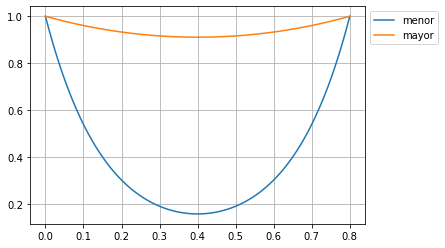

In [10]:
x = np.linspace(0.00001, h, num=100)
f = lambda x: a1*np.cosh(x/a1-h/(2*a1))
g = lambda x: a2*np.cosh(x/a2-h/(2*a2))

plt.plot(x, f(x), label='menor')
plt.plot(x, g(x), label='mayor')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

![funcion.png](area.png)

El área de la película jabonosa es $A=\displaystyle \int_0^h 2 \pi y \sqrt{1 + \dfrac{dy}{dx}}dx = 2 \pi a \displaystyle \int_0^h \cosh^2 \Big(\dfrac{x}{a} - \dfrac{h}{2a} \Big) dx = \pi a^2 \Big(\sinh \Big(\dfrac{h}{a}\Big) +  \dfrac{h}{a}\Big)$

Para cada separación $h<hc$ entre los dos aros de radio $R$ hay dos posibles superficies: una cuyo radio mínimo $r/R$ es mayor que $xc$ y la otra, cuyo radio mínimo es menor que $xc$.

Calculamos al área $A$ de estas dos superficies de revolución y las representamos en función de $h/R$.

In [11]:
x = np.linspace(0, h, num=100)

#Ärea por medio de la integral
I1 = integrate.quad(lambda x: (np.cosh (x/a1 - h/(2*a1)))**2, 0, h)
I2 = integrate.quad(lambda x: (np.cosh (x/a2 - h/(2*a2)))**2, 0, h)
A1 = 2 * np.pi * a1 * I1
A2 = 2 * np.pi * a2 * I2

#Área por medio de la fórmula
A1_f = np.pi * (a1**2) * (np.sinh(h/a1) + h/a1)
A2_f = np.pi * (a2**2) * (np.sinh(h/a2) + h/a2)
print(A1, A2)
print(A1_f, A2_f)

[6.60130353e+00 2.86022586e-13] [4.88379320e+00 5.42209966e-14]
[6.60130353] [4.8837932]


## SOLAR SUNSPOT NUMBER

**Tarea 2**: Vamos a probar algo. Quisiera ver si es posible modelar esta serie temporal a través de una expansión ortogonal polinomial. Así, dada una función continuua $f(x)$, entonces sabemos que 
    \begin{equation}
    f_n(x)=\sum_{\ell =0}^{n}a_{\ell}P_{\ell}(x)
    \end{equation}
    donde $f_n(x)$ converge a la media de $f(x)$ en $n\to \infty$, sabiendo que
    \begin{equation}
    a_{\ell }={\frac{2\ell +1}{2}}\int _{-1}^{1}f(x)P_{\ell }(x)dx
    \end{equation}
    Una expresión especialmente compacta para los polinomios de Legendre viene dada por la fórmula de Rodrigues: 
    \begin{equation}
    P_{n}(x)={\frac {1}{2^{n}n!}}{\frac {d^{n}}{dx^{n}}}(x^{2}-1)^{n}
    \end{equation}

Entonces, nos gustaría saber si esta aproximación es buena para este problema de modelar los ciclos solares con alguna tolerancia. Los datos están en `datas/SN_y_tot_V2.0.csv`. Si esto sale bien, entonces es posible (quizás) bajo una cierta tolerancia y error (por su puesto) poder predecir los futuros sunspot.!!!

In [12]:
#Description of dataset in: https://wwwbis.sidc.be/silso/infosnytot
# Data available on: https://wwwbis.sidc.be/silso/datafiles
SSN=pd.read_csv("../data/SN_y_tot_V2.0.csv",delimiter=";",names=["Year","mean","std","observations","provisional"])
SSN.head()

,Year,mean,std,observations,provisional
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1


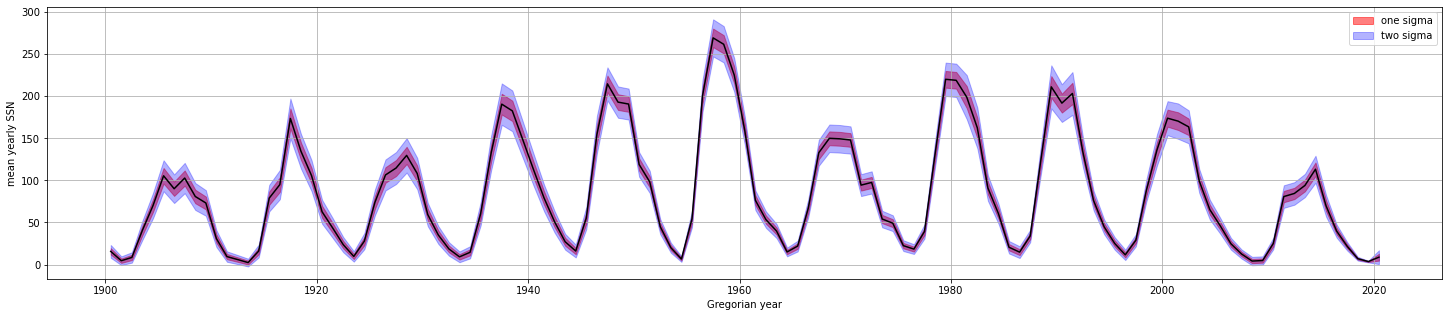

In [13]:
plt.figure(figsize=(25,5))
ii=SSN["Year"]>=1900
SSN2=SSN[ii]
plt.plot(SSN2["Year"],SSN2["mean"],color='k')
plt.fill_between(SSN2["Year"],SSN2["mean"]-SSN2["std"],SSN2["mean"]+SSN2["std"],color="red",alpha=0.5,label="one sigma")
plt.fill_between(SSN2["Year"],SSN2["mean"]-2*SSN2["std"],SSN2["mean"]+2*SSN2["std"],color="blue",alpha=0.3,label="two sigma")
plt.xlabel("Gregorian year")
plt.ylabel("mean yearly SSN")
plt.legend()
plt.grid()
plt.show()

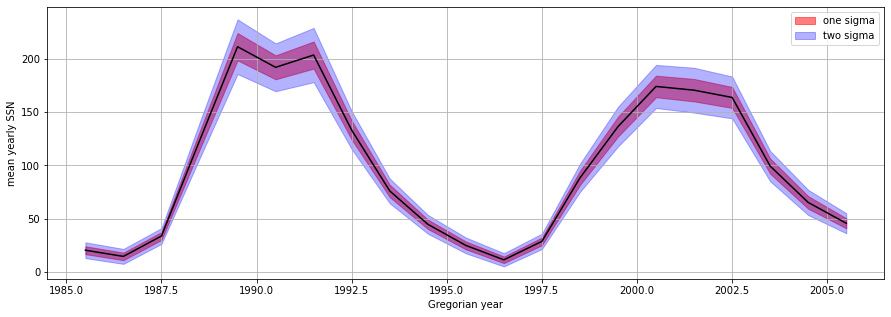

In [14]:
ssn = SSN[(SSN.Year >= 1985) & (SSN.Year <= 2006)]

plt.figure(figsize=(15,5))
#ii=SSN["Year"]>=1900
#SSN2=SSN[ii]
plt.plot(ssn["Year"],ssn["mean"],color='k')
plt.fill_between(ssn["Year"],ssn["mean"]-ssn["std"],ssn["mean"]+ssn["std"],color="red",alpha=0.5,label="one sigma")
plt.fill_between(ssn["Year"],ssn["mean"]-2*ssn["std"],ssn["mean"]+2*ssn["std"],color="blue",alpha=0.3,label="two sigma")
plt.xlabel("Gregorian year")
plt.ylabel("mean yearly SSN")
plt.legend()
plt.grid()
plt.show()

In [18]:
x_p = np.array([1985.5, 1990.5, 1995.5, 2000.5, 2005.5])
y_p = np. array([20.6, 191.8, 25.1, 173.9, 45.8])